# OpenCV Library


Estimated time needed: **60** minutes


<h2>Objectives</h2>


Image processing and computer vision tasks include displaying, cropping, flipping, rotating,  image segmentation, classification, image restoration,  image recognition, image generation.  Also, working with images via the cloud requires storing and transmitting, and gathering images through the internet. 
Python is an excellent choice as it has many image processing tools, computer vision, and artificial intelligence libraries. Finally, it has many libraries for working with files in the cloud and the internet.
A digital image is simply a file on your computer. In this lab, you will gain an understanding  of these files and learn to work with these files with some popular libraries


<ul>
    <li><a href='#PIL'>Open CV </a>
        <ul>
            <li>Image Files and Paths  </li>
            <li>Load in Image in Python</li>
            <li>Plotting an Image </li>
            <li>Gray Scale Images, Quantization and Color Channels  </li>
            <li>Gray Scale Images, Quantization and Color Channels  </li>
        </ul>
    </li>
    
</ul>


----


Download the image for the lab:


In [26]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

'wget' is not recognized as an internal or external command,
operable program or batch file.


'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


First, let's define a helper function to concatenate two images side-by-side. You will need to understand this code this moment, but this function will be used repeatedly in this tutorial to showcase the results.


In [ ]:
from tkinter import Image                     # import lớp Image để xử lý ảnh (theo code hiện tại)
def get_concat_h(im1, im2):                   # hàm ghép 2 ảnh theo chiều ngang
    # https://note.nkmk.me/en/python-pillow-concat-images/
    dst = Image.new(                          # tạo ảnh mới rỗng
        'RGB',                                # chế độ màu RGB
        (im1.width + im2.width, im1.height)  # chiều rộng = tổng chiều rộng 2 ảnh, chiều cao = chiều cao ảnh 1
    )
    dst.paste(im1, (0, 0))                    # dán ảnh thứ nhất vào bên trái
    dst.paste(im2, (im1.width, 0))            # dán ảnh thứ hai vào bên phải ảnh thứ nhất
    return dst                                # trả về ảnh đã ghép

## Image Files and Paths  


An image is stored as a file on your computer. Below, we define `my_image` as the filename of a file in this directory.


In [ ]:
my_image = "lenna.png"  #gán file ảnh bằng biến my_image 

Filename consists of two parts, the name of the file and the extension, separated by a full stop (`.`). The extension specifies the format of the image. There are two popular image formats -- Joint Photographic Expert Group image (or `.jpg`, `.jpeg`) and Portable Network Graphics (or `.png`). These file types make it simpler to work with images. For example, it compresses the image using sine/cosine approximations, taking less spaces on your drive to store the image.


Image files are stored in the file system of your computer. The location of it is specified using a "path", which is often unique. You can find the path of your current working directory with Python's `os` module. The `os` module provides functions to interact with the file system, e.g. creating or removing a directory (folder), listing its contents, changing and identifying the current working directory. 


In [ ]:
import os    #import thư viện os để làm việc với hệ điều hành
cwd = os.getcwd() # lấy thư mục làm việc hiện tại 
cwd         #in ra đường dẫn thư mục hiện tại 

'c:\\YYYYY\\NAM BA\\HKII\\CV\\BUOI1'

The "path" to an image can be found using the following line of code.


In [ ]:
#image_path = os.path.join(cwd, my_image)
image_path = "lenna.png".encode('utf-8').decode()  # gán đường dẫn ảnh, encode rồi decode để tránh lỗi encoding
image_path  #in ra giá trị của đường dẫn ảnh

'lenna.png'

## Load in Image in Python


OpenCV is a library used for computer vision. It has more functionality than the `PIL` library but is more difficult to use. We can import `OpenCV` as follows:


In [ ]:
import cv2  # import thư viện OpenCV để xử lý ảnh

The <code>imread()</code> method loads an image from the specified file, the input is the <code>path</code> of the image to be read (just like PIL), the <code>flag</code> paramter specifies how the image should be read, and the default value is <code>cv2.IMREAD_COLOR</code>.


In [ ]:
image = cv2.imread(my_image)  # đọc ảnh từ đường dẫn my_image, trả về mảng NumPy

The result is a numpy array with intensity values as 8-bit unsigned integers. 


In [ ]:
type(image)  # kiểm tra kiểu dữ liệu của image (thường là numpy.ndarray)

numpy.ndarray

We can get the shape of the array from the `shape` attribute.


In [34]:
image.shape

(225, 225, 3)

The shape is the same as the PIL array, but there are several differences; for example, PIL returns in (R, G, B) format whereas OpenCV returns in (B, G, R) format.


Each pixel could take on 256 possible values as intensity, ranging from 0 to 255, with 0 being the lowest intensity and 255 being the highest. The maximum and minimum intensity values of an image can be obtained, respectively, by calling:


In [35]:
image.max()

255

and


In [36]:
image.min()

0

##  Plotting an Image 


You can use OpenCV's `imshow` function to open the image in a new window, but this may give you some issues in Jupyter:


In [37]:
#cv2.imshow('image', imgage)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

You can also use the `imshow` function from the `matplotlib` library:


In [38]:
import matplotlib.pyplot as plt

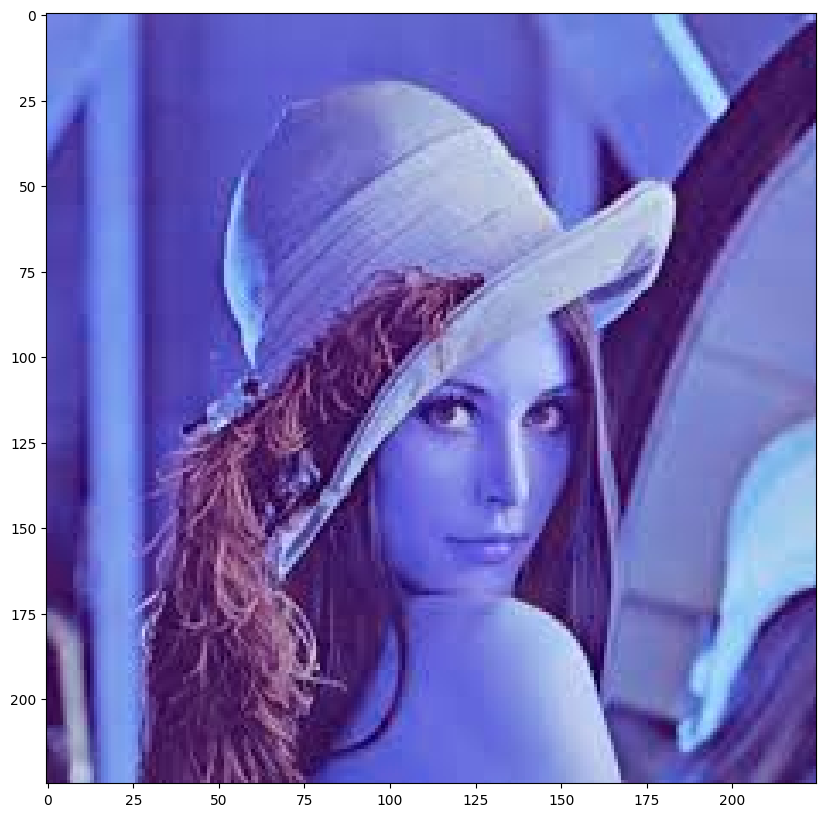

In [ ]:
plt.figure(figsize=(10,10))   # Tạo khung hiển thị kích thước 10x10
plt.imshow(image)             # Hiển thị ảnh image
plt.show()                    # Hiển thị ảnh ra màn hình

The image output doesn't look natural. This is because the order of RGB Channels are different. We can change the color space with conversion code and the function `cvtColor` from the `cv2` library:


In [ ]:
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # chuyển ảnh từ hệ màu BGR (OpenCV) sang RGB (Matplotlib/PIL)

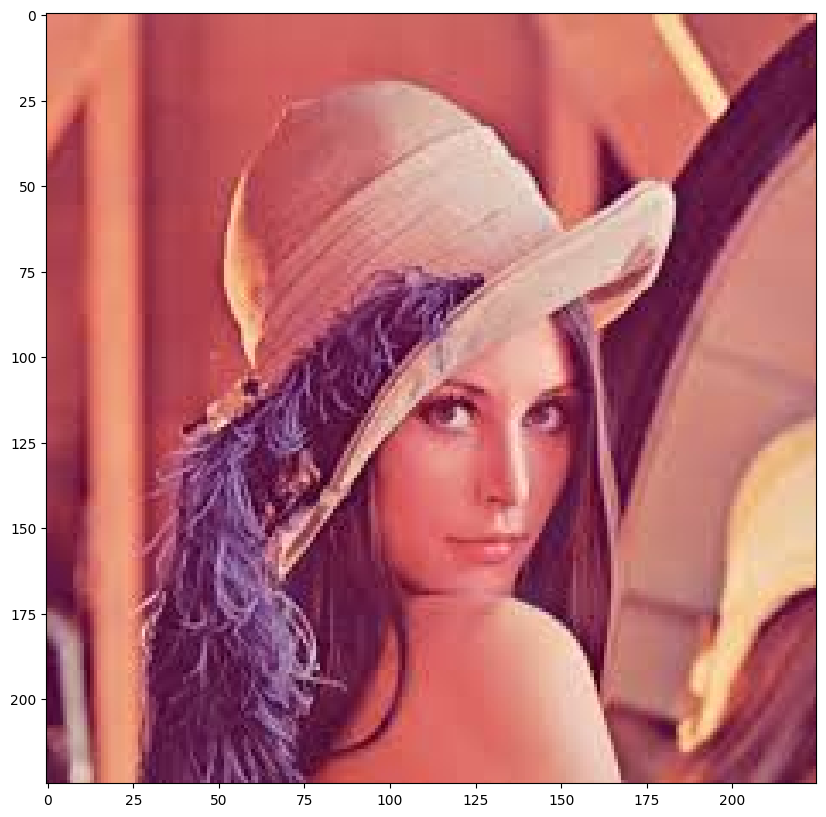

In [ ]:
plt.figure(figsize=(10,10))   # Tạo khung hiển thị kích thước 10x10
plt.imshow(new_image)         # Hiển thị ảnh new_image
plt.show()                    # Hiển thị ảnh ra màn hình


You can also load the image using its path, this comes in handy if the image is not in your working directory:


In [ ]:
image = cv2.imread(image_path)  # Đọc ảnh bằng OpenCV (ảnh ở dạng BGR)
print(image.shape)  # Lấy kích thước mảng ảnh

(225, 225, 3)


You can save the image as in `jpg` format.


In [ ]:
cv2.imwrite("lenna.jpg", image)  # Lưu ảnh image thành file lenna.jpg

True

### Grayscale Images


Grayscale images have pixel values representing the amount of light or intensity. Light shades of gray have a high-intensity darker shades have a lower intensity. White has the highest intensity, and black the lowest. We can convert an image to Gray Scale using a color conversion code and the function <code>cvtColor</code>.


The code for RGB to gray is <code>cv2.COLOR_BGR2GRAY</code>, we apply the function:


In [ ]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # chuyển ảnh màu BGR sang ảnh xám (grayscale)

The image array has only two dimensions, i.e. only one color channel:


In [45]:
image_gray.shape

(225, 225)

We can plot the image using `imshow` but we have to specify the color map is gray:


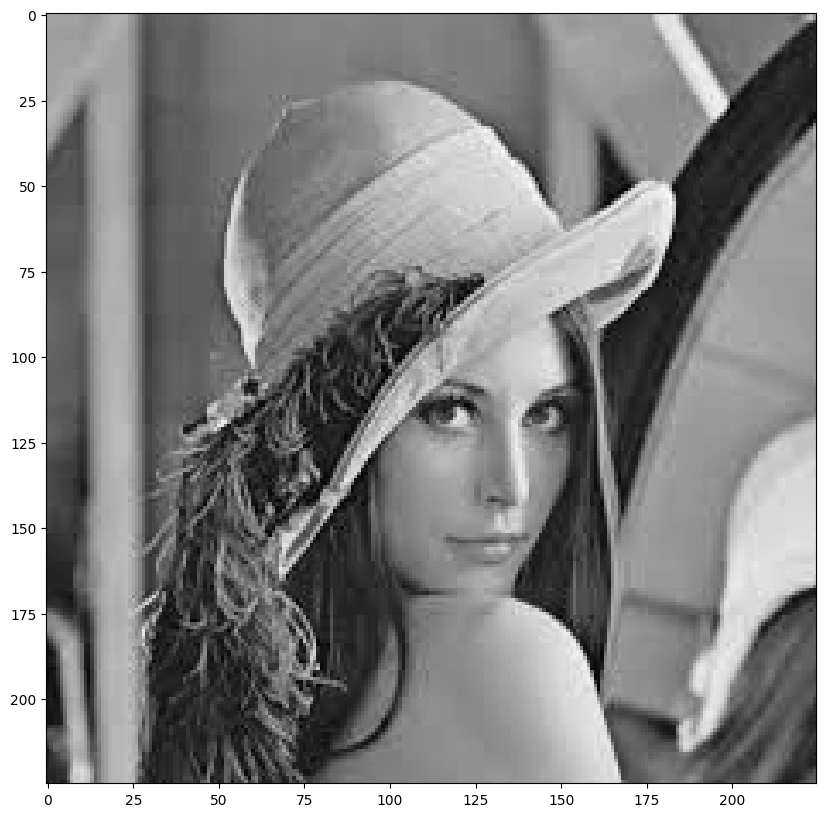

In [ ]:
plt.figure(figsize=(10, 10))        # Tạo khung hiển thị kích thước 10x10
plt.imshow(image_gray, cmap='gray') # Hiển thị ảnh xám (grayscale)
plt.show()                          # Hiển thị ảnh ra màn hình

We can save the image as a grayscale image, let's save it as a `jpg` as well, in the working directory.


In [ ]:
cv2.imwrite('lena_gray_cv.jpg', image_gray)  # lưu ảnh xám image_gray ra file lena_gray_cv.jpg

True

You can also load in a grayscale image we have to set <code>flag</code> parameter to gray color conversation code: <code>cv2.COLOR_BGR2GRAY</code>:


In [ ]:
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)  # đọc ảnh barbara.png dưới dạng ảnh xám

We can plot the image:


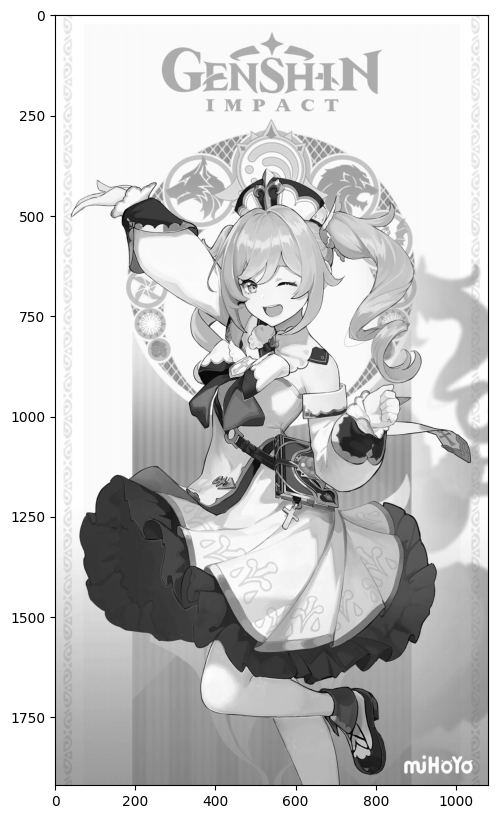

In [ ]:
plt.figure(figsize=(10,10))     # Tạo khung hiển thị kích thước 10x10
plt.imshow(im_gray, cmap='gray')# Hiển thị ảnh xám (grayscale)
plt.show()                      # Hiển thị ảnh ra màn hình

### Color Channels  


We can also work with the different color channels. Consider the following image:


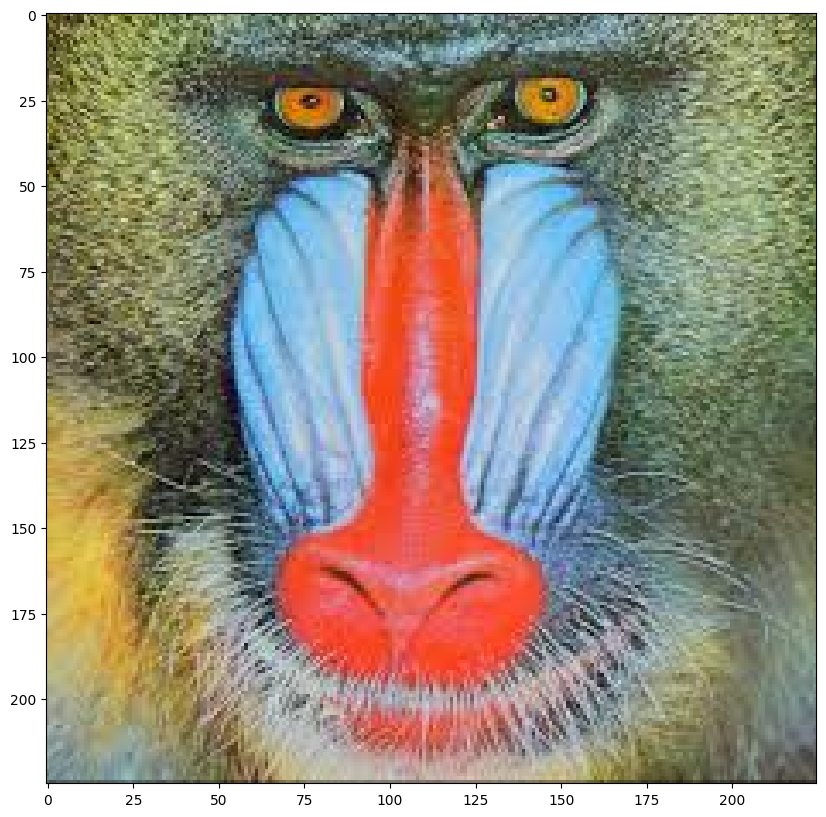

In [ ]:
baboon = cv2.imread('baboon.png')                 # đọc ảnh baboon.png bằng OpenCV (mặc định hệ màu BGR)
plt.figure(figsize=(10,10))                       # tạo khung hiển thị kích thước 10x10
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))  # chuyển BGR → RGB để hiển thị đúng màu
plt.show()                                        # hiển thị ảnh ra màn hình

We can obtain the different RGB colors and assign them to the variables <code>blue</code>, <code>green</code>, and <code>red</code>, in (B, G, R) format.


In [ ]:
blue, green, red = baboon[:, :, 0], baboon[:, :, 1], baboon[:, :, 2]  # tách 3 kênh màu từ ảnh baboon

We can concatenate each image channel the images using the function <code>vconcat</code>.


In [ ]:
im_bgr = cv2.vconcat([blue, green, red])  # ghép 3 ảnh kênh Blue, Green, Red theo chiều dọc (vertical)

Plotting the color image next to the red channel in grayscale, we see that regions with red have higher intensity values.


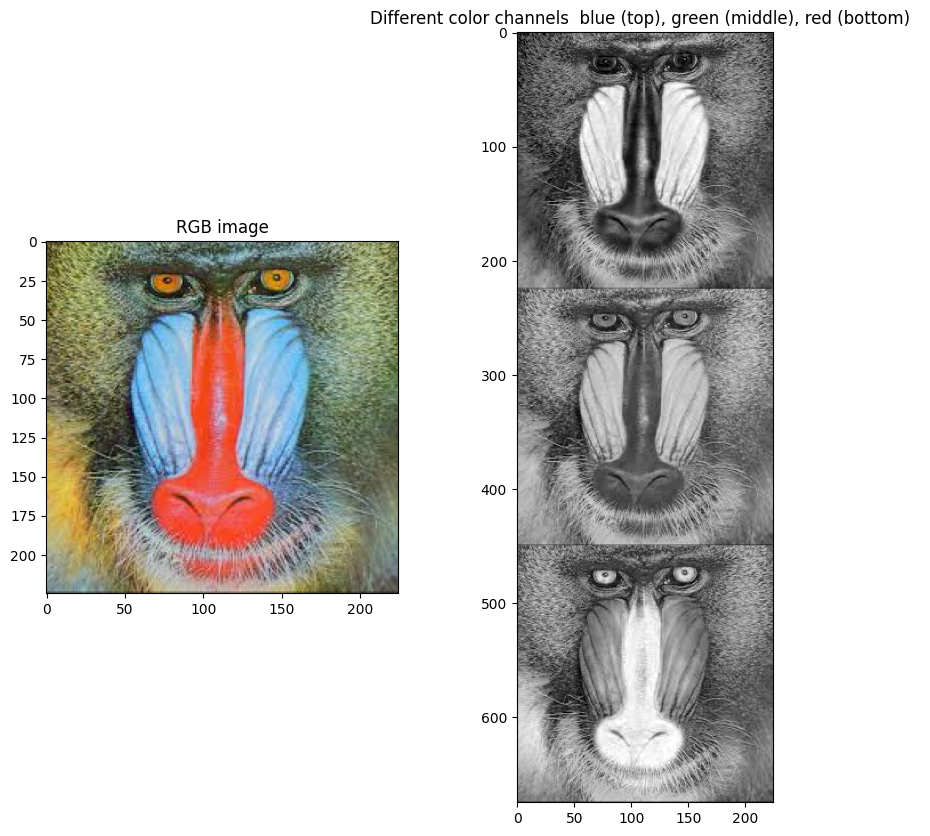

In [ ]:
plt.figure(figsize=(10,10))                                   # tạo khung hiển thị tổng kích thước 10x10

plt.subplot(121)                                              # chia khung: 1 hàng, 2 cột, vị trí 1
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))           # hiển thị ảnh baboon màu (đã đổi BGR → RGB)
plt.title("RGB image")                                        # tiêu đề ảnh bên trái

plt.subplot(122)                                              # vị trí 2 trong bố cục 1x2
plt.imshow(im_bgr, cmap='gray')                               # hiển thị ảnh ghép 3 kênh dưới dạng ảnh xám
plt.title("Different color channels  blue (top), green (middle), red (bottom)")  # tiêu đề ảnh bên phải

plt.show()                                                    # hiển thị toàn bộ figure

### Indexing  


We can use numpy slicing. For example, we can return the first 256 rows corresponding to the top half of the image:


In [56]:
rows = 256

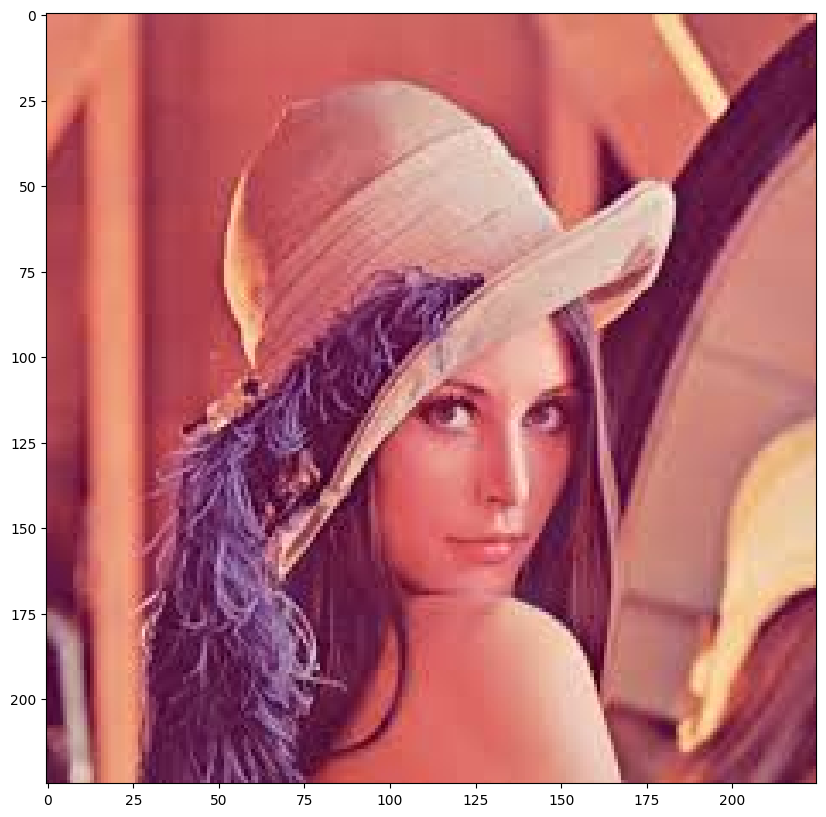

In [ ]:
plt.figure(figsize=(10,10))              # tạo khung hiển thị kích thước 10x10
plt.imshow(new_image[0:rows, :, :])      # hiển thị ảnh new_image, lấy từ hàng 0 đến rows-1 (toàn bộ cột và kênh màu)
plt.show()                               # hiển thị ảnh ra màn hình

We can also return the first 256 columns corresponding to the first half of the image:


In [58]:
columns = 256

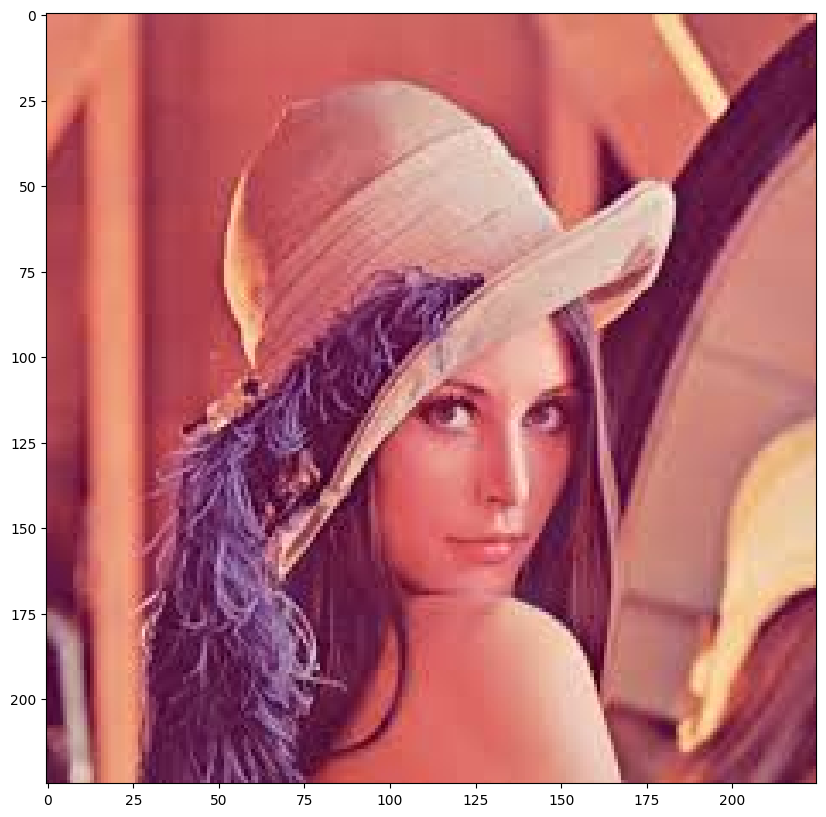

In [ ]:
plt.figure(figsize=(10,10))              # tạo khung hiển thị kích thước 10x10
plt.imshow(new_image[0:rows, :, :])      # hiển thị ảnh new_image, lấy từ hàng 0 đến rows-1 (toàn bộ cột và kênh màu)
plt.show()                               # hiển thị ảnh ra màn hình

If you want to reassign an array to another variable, you should use the `copy` method (we will cover this in the next section).


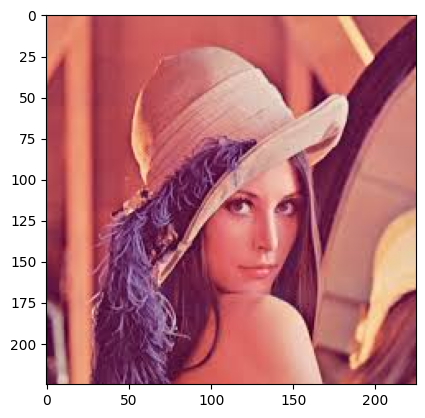

In [ ]:
A = new_image.copy()  # tạo bản sao độc lập của new_image để tránh thay đổi ảnh gố
plt.imshow(A)
plt.show()

If we do not apply the method `copy()`, the variable will point to the same location in memory. Consider the variable `B` below, if we set all values of array `A` to zero, since `A` and `B` points to the same object in the memory, `B` will also have all-zero elements:


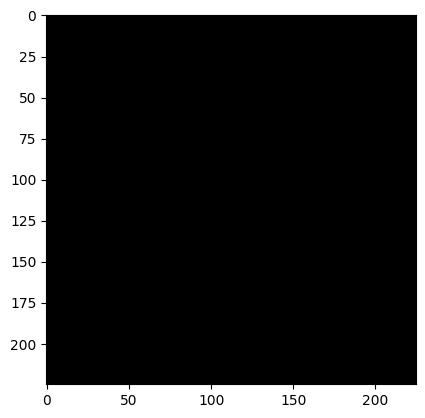

In [ ]:
B = A                   # B trỏ cùng vùng nhớ với A (không phải copy)
A[:,:,:] = 0            # gán toàn bộ pixel của A = 0 → ảnh đen
plt.imshow(B)
plt.show()

We can also manipulate elements using indexing. In the following piece of code, we create a new array `baboon_red` and set all but the red color channels to zero. Therefore, when we display the image, it appears red:


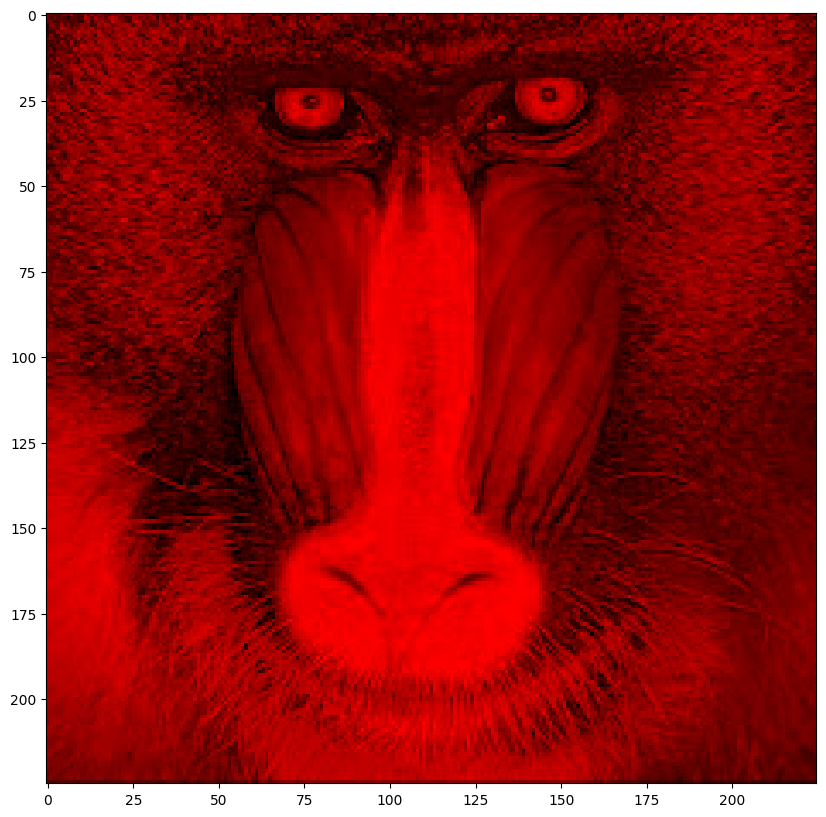

In [ ]:
baboon_red = baboon.copy()                               # copy ảnh gốc baboon để tránh thay đổi dữ liệu ban đầu
baboon_red[:, :, 0] = 0                                  # đặt kênh Blue = 0
baboon_red[:, :, 1] = 0                                  # đặt kênh Green = 0, chỉ giữ kênh Red
plt.figure(figsize=(10, 10))                             # tạo khung hiển thị kích thước 10x10
plt.imshow(cv2.cvtColor(baboon_red, cv2.COLOR_BGR2RGB))  # chuyển BGR → RGB rồi hiển thị ảnh màu đỏ
plt.show()                                               # hiển thị ảnh ra màn hình

We can do the same for blue:  


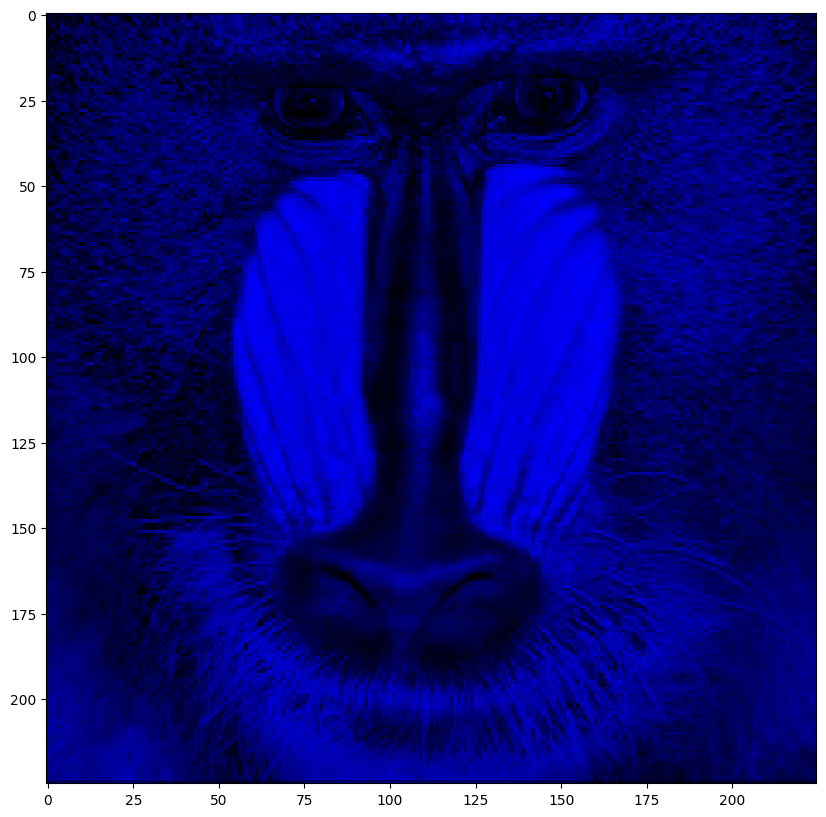

In [ ]:
baboon_blue = baboon.copy()                              # copy ảnh gốc baboon để không làm thay đổi dữ liệu ban đầu
baboon_blue[:, :, 1] = 0                                 # đặt kênh Green = 0
baboon_blue[:, :, 2] = 0                                 # đặt kênh Red = 0, chỉ giữ kênh Blue
plt.figure(figsize=(10, 10))                             # tạo khung hiển thị kích thước 10x10
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB)) # chuyển BGR → RGB rồi hiển thị ảnh màu xanh lam
plt.show()                                               # hiển thị ảnh ra màn hình

We can do the same for green:


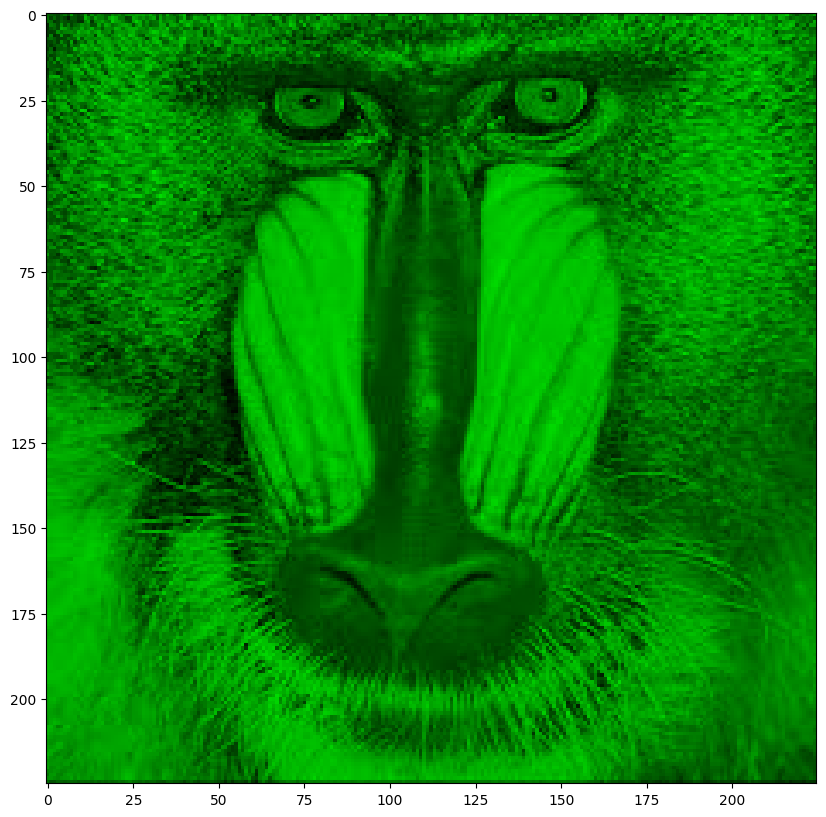

In [ ]:
baboon_green = baboon.copy()                              # copy ảnh gốc baboon để không làm thay đổi dữ liệu ban đầu
baboon_green[:, :, 0] = 0                                 # đặt kênh Blue = 0
baboon_green[:, :, 2] = 0                                 # đặt kênh Red = 0, chỉ giữ kênh Green
plt.figure(figsize=(10,10))                               # tạo khung hiển thị kích thước 10x10
plt.imshow(cv2.cvtColor(baboon_green, cv2.COLOR_BGR2RGB)) # chuyển BGR → RGB rồi hiển thị ảnh màu xanh lá
plt.show()                                                # hiển thị ảnh ra màn hình

In [65]:
image=cv2.imread('baboon.png')

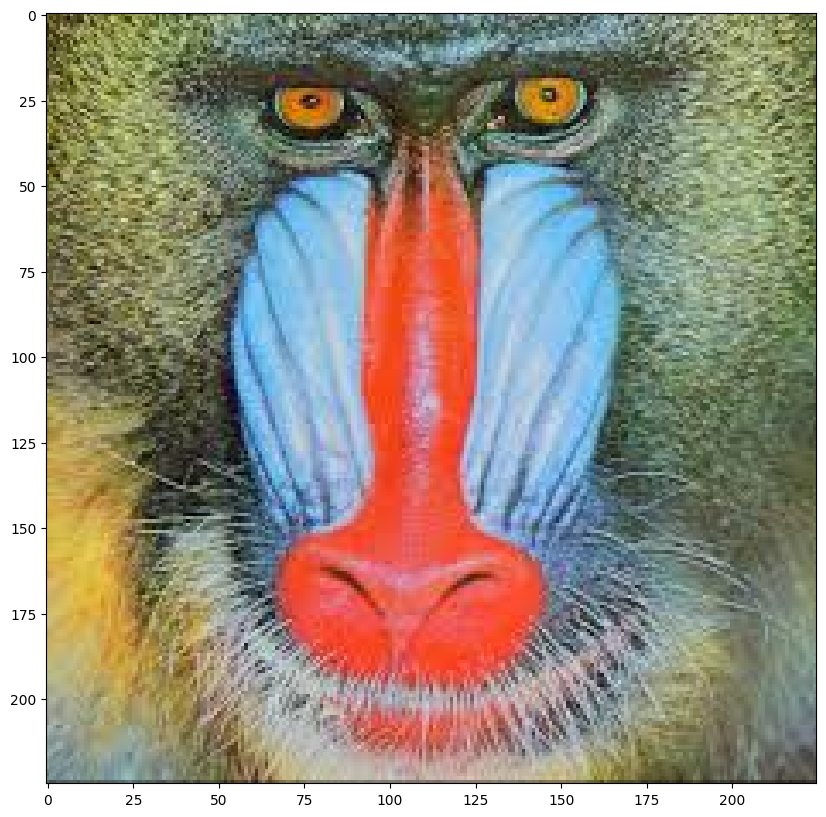

In [ ]:
plt.figure(figsize=(10,10))                          # Tạo khung hiển thị kích thước 10x10
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))   # Chuyển ảnh từ BGR sang RGB rồi hiển thị
plt.show()                                           # Hiển thị ảnh ra màn hình


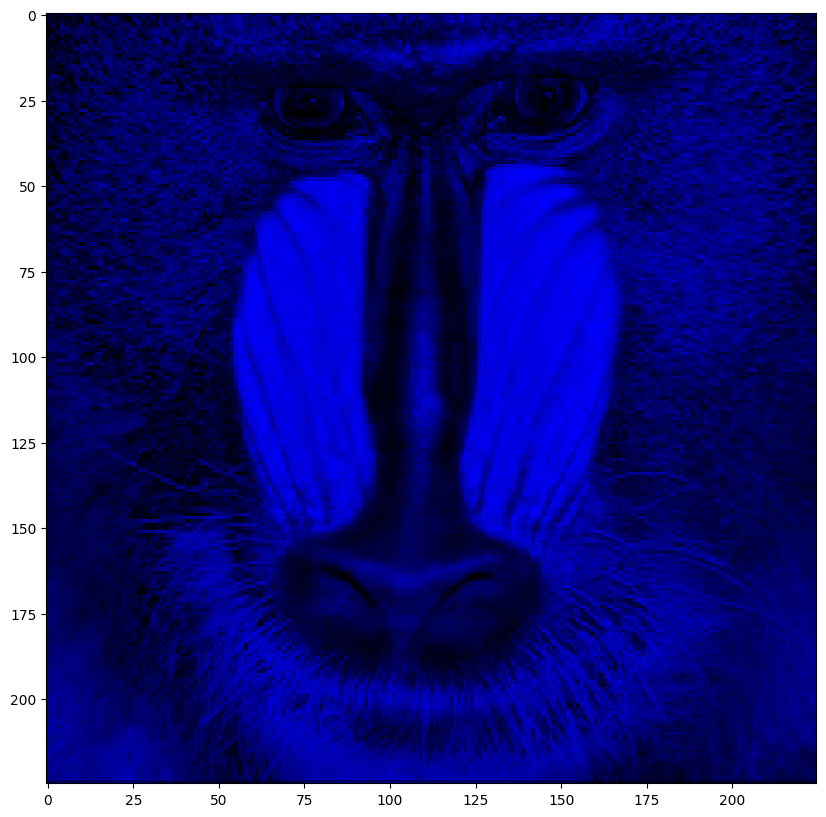

In [ ]:
image = cv2.imread('baboon.png')                           # đọc ảnh baboon.png bằng OpenCV (mặc định hệ màu BGR)
baboon_blue = image.copy()                                 # copy ảnh gốc để tránh làm thay đổi image
baboon_blue[:, :, 1] = 0                                   # đặt kênh Green = 0
baboon_blue[:, :, 2] = 0                                   # đặt kênh Red = 0, chỉ giữ kênh Blue
plt.figure(figsize=(10,10))                                # tạo khung hiển thị kích thước 10x10
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))   # chuyển BGR → RGB rồi hiển thị ảnh xanh lam
plt.show()                                                 # hiển thị ảnh ra màn hình

### Question 1: 
Use the image `baboon.png` from this lab or take any image you like.

Open the image and create a OpenCV Image object called `baboon_blue`, convert the image from BGR format to RGB format, get the blue channel out of it, and finally plot the image


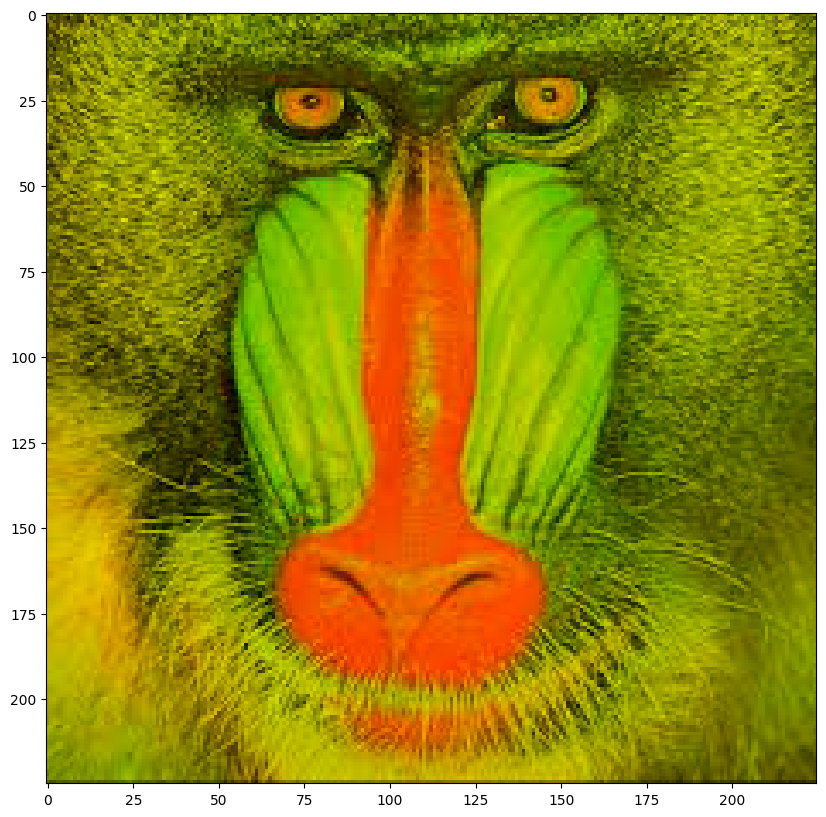

In [ ]:
baboon_blue = cv2.imread('baboon.png')        # đọc ảnh baboon.png bằng OpenCV (mặc định hệ màu BGR)
baboon_blue = cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB)  # chuyển ảnh từ BGR sang RGB
baboon_blue[:, :, 2] = 0                      # đặt kênh Blue = 0 (loại bỏ kênh xanh lam)
plt.figure(figsize=(10,10))                   # tạo khung hiển thị kích thước 10x10
plt.imshow(baboon_blue)                       # hiển thị ảnh sau khi đã bỏ kênh Blue
plt.show()                                    # hiển thị ảnh ra màn hình

Double-click **here** for a hint.

<!-- The hint is below:

baboon_blue[:,:,2] = 0

-->


Double-click **here** for the solution.

<!-- The answer is below:

baboon_blue=cv2.imread('baboon.png')
baboon_blue=cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB)
baboon_blue[:,:,2] = 0
plt.figure(figsize=(10,10))
plt.imshow(baboon_blue)
plt.show()

-->


### So sánh 2 thư viện PIL và CV, liệt kê so sánh trong 1 cell markdown 

- Mục đích chính :
    + PIL : dùng để xử lý ảnh cơ bản, thao tác file ảnh, chỉnh sửa ảnh tỉnh.
    + CV: dùng để xử lý ảnh nâng cao, thị giác máy tnhs, video, camera.
- Hiệu năng: 
    + PIL: chậm hơn khi xử lý ảnh lớn hoặc nhiều ảnh.
    + CV: nhanh, tối ưu cho ảnh lớn.
- Xử lý màu:
    + PIL: hỗ trợ chuyển đổi ảnh xám RGB, RGBA, L.
    + CV : hỗ trợ chuyển đổi màu (BGR <-> RGB, HSV,...) tách kênh, điều chỉnh.
- Thuật toán : 
    + PIL : ít thuật toán hơn ( cắt, resize, rotate, filter cơ bản).
    + CV: nhiều thuật toán hớn (threshholding, face detection, edge detection,...).
- Ưu điểm : 
    + PIL: Dễ dùng, nhẹ, nhanh cho các thao tác cơ bản, xử lý ảnh tĩnh.
    + CV: Nhanh, mạnh, hỗ trợ real-time, nhiều thuật toán CV.
- Nhược điểm:
    + PIL :Không tối ưu cho video và xử lý ảnh lớn, thiếu thuật toán nâng cao.
    + CV : mặc định BGR dễ nhầm, không trực quan cho các thao tác đơn giản, đôi khi quá nặng cho task nhỏ.

# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).


<!--<h2>Change Log</h2>-->


<!--
<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
    <tr>
        <td>2021-03-06</td>
        <td>0.3</td>
        <td>Nayef</td>
        <td>Modified some codes</td>
    </tr>
</table>
-->
